In [140]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from matplotlib.cm import ScalarMappable
import numpy as np

In [193]:
n = 15  # number of nodes
eps = 0.2
radius = (1+eps)*np.sqrt(np.log(n)/n)  # radius for edge connection


In [194]:
# generate nodes with random positions in [0,1]x[0,1]
pos = {i: (random.random(), random.random()) for i in range(n)}

# create graph and add nodes
G = nx.Graph()
G.add_nodes_from(range(n))

# add edges between nodes within the radius
for i in range(n):
    for j in range(i+1, n):
        dist = ((pos[i][0]-pos[j][0])**2 + (pos[i][1]-pos[j][1])**2)**0.5
        if dist <= radius:
            weight = random.uniform(0, 1)  # add random uniform weight to edge
            G.add_edge(i, j, weight=weight)

# get edge weights
edge_weights = [G[i][j]['weight'] for i, j in G.edges()]

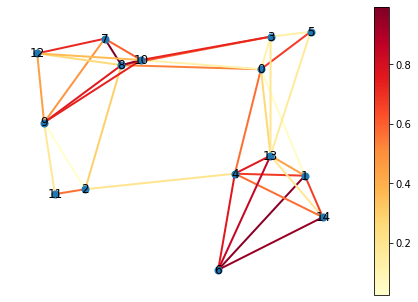

In [195]:
# set color map for edges
edge_cmap = plt.cm.get_cmap('YlOrRd')

# create a ScalarMappable object for edges
edge_norm = plt.Normalize(min(edge_weights), max(edge_weights))
edge_sm = ScalarMappable(norm=edge_norm, cmap=edge_cmap)

# visualize graph with edges colored according to their weights
nx.draw(G, pos, node_size=50, edge_color=edge_weights,
        edge_cmap=edge_cmap, width=2, with_labels=True)
plt.colorbar(edge_sm)
plt.show()

In [196]:
edges = [(i, j, G[i][j]['weight']) for i, j in G.edges()]
sorted_edges = sorted(edges, key=lambda x: x[2])
flipped = [(j, i, w) for i, j, w in sorted_edges]
sorted_edges = [elem for pair in zip(sorted_edges, flipped) for elem in pair] # interweave
sorted_edges = np.array(sorted_edges)

In [198]:
def increasing_paths(L): 
    if len(L) == 0:
        return []
    else:
        u, v, _ = L[0]
        paths = increasing_paths(L[1:])
        new_paths = []
        # print('(u,v) =', int(u), int(v), '; paths to check:', paths)
        for path in paths:
            # print('** checking path', path)
            if path[0] == v and u not in path:
                # print('**** found an addition!', [int(u)] + path)
                new_paths.append([int(u)] + path) # new path with u added
            new_paths.append(path) # keep the old path in both cases
        # print('new_paths', new_paths, 'and we return this with', [[int(u), int(v)]])
        return new_paths + [[int(u), int(v)]] 

In [199]:
# tail-recursive version of the above function
def increasing_paths_helper(L, acc=[]):
    if len(L) == 0:
        return acc
    else:
        u, v, _ = L[0]
        new_paths = []
        for path in acc:
            if path[0] == v and u not in path:
                new_paths.append([int(u)] + path) # new path with u added
            new_paths.append(path) # keep the old path either way
        return increasing_paths_helper(L[1:], new_paths + [[int(u), int(v)]])
    
def increasing_paths_tailrec(L):
    # flip the paths so that the edges are increasing not decreasing
    return [path[::-1] for path in increasing_paths_helper(L, [])]

In [208]:
def get_path_lengths(increasing_paths):
    # return the lengths of the paths (number of edges)
    return [len(path) - 1 for path in increasing_paths]

def get_path_weight_lists(increasing_paths):
    # return the weight list of each path
    return [[G[i][j]['weight'] for i, j in zip(path[:-1], path[1:])] for path in increasing_paths]

In [200]:
incr_paths = increasing_paths_tailrec(sorted_edges)
incr_paths_lengths = get_path_lengths(incr_paths)

In [205]:
print(len(incr_paths_lengths), 'increasing paths found') 
# print('of lengths:', incr_paths_lengths)
print('maximum path length: ', max(incr_paths_lengths))

890 increasing paths found
maximum path length:  7
